In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

data = './data/'

# Feature engineering and data representation

The first component of feature engineering often simply defines a set of hand-crafted features on which we have direct domain knowledge.

In [3]:
df = pd.read_csv(f'{data}correct_tips.csv', index_col=0)

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
1,0.00,3.006461,Female,No,Sun,Dinner,2,57
2,10.34,1.660000,Male,No,Sun,Dinner,3,23
3,21.01,3.500000,Male,No,Sun,Dinner,3,62
4,23.68,3.310000,Male,No,Sun,Dinner,2,62
5,24.59,3.610000,Female,No,Sun,Dinner,4,62
...,...,...,...,...,...,...,...,...
240,29.03,5.920000,Male,No,Sat,Dinner,3,25
241,27.18,2.000000,Female,Yes,Sat,Dinner,2,42
242,22.67,2.000000,Male,Yes,Sat,Dinner,2,64


## Discretization

Discretization indicates the process of turning a countinuous variable into a discrete one. In data understanding, we have seen an hand-crafted process to do so, but we can leverage numerical methods to replace it. We are going to identify contingent subsets of values, and each set will be assigned a category.

|               | Bounds                                |
| ---------     | ------------------------------------- |
| Linear space  | Equi-spaced thresholds in the dataset |
| Quantiles     | Empyrical quantiles in the dataset    |
| Proximity     | Values are clustered                  |

In all cases, **we** decide how many categories to create.

[Reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html).

In [5]:
from sklearn.preprocessing import KBinsDiscretizer


discretizer = KBinsDiscretizer(
    n_bins=4,  # number of categories
    encode="ordinal",  # categories are assigned in increasing order of value
#     encode="onehot",  # categories are assigned in a one-hot vector
    strategy="uniform",  # uses linear space
    # strategy="quantiles",  # uses quantiles
#     strategy="kmeans",  # uses proximity
)

col = "total_bill"
col_disc = "disc_"+col
df.loc[:, col_disc] = discretizer.fit_transform(df[[col]])
df = df.astype({col_disc: int})

print(f"Thresholds: {discretizer.bin_edges_}")
print(f"Number of extracted categories: {discretizer.n_bins_}")
df.head()

Thresholds: [array([ 0.    , 12.7025, 25.405 , 38.1075, 50.81  ])]
Number of extracted categories: [4]


,total_bill,tip,sex,smoker,day,time,size,age,disc_total_bill
ID,,,,,,,,,
1,0.00,3.006461,Female,No,Sun,Dinner,2,57,0
2,10.34,1.660000,Male,No,Sun,Dinner,3,23,0
3,21.01,3.500000,Male,No,Sun,Dinner,3,62,1
4,23.68,3.310000,Male,No,Sun,Dinner,2,62,1
5,24.59,3.610000,Female,No,Sun,Dinner,4,62,1


In [6]:
df[col_disc].value_counts()

disc_total_bill
1    140
0     52
2     40
3     12
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 1 to 244
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   total_bill       244 non-null    float64
 1   tip              244 non-null    float64
 2   sex              244 non-null    object 
 3   smoker           244 non-null    object 
 4   day              244 non-null    object 
 5   time             244 non-null    object 
 6   size             244 non-null    int64  
 7   age              244 non-null    int64  
 8   disc_total_bill  244 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 19.1+ KB


---

# Data representation

In [8]:
df.dtypes

total_bill         float64
tip                float64
sex                 object
smoker              object
day                 object
time                object
size                 int64
age                  int64
disc_total_bill      int64
dtype: object

# Feature Scaling: StandardScaler vs. MinMaxScaler

When working with machine learning algorithms, it is often useful (or even required) to **rescale features** so that they are comparable in magnitude. Two common techniques are:

---

## StandardScaler
- **What it does**:  
  Transforms features so that they have **zero mean** and **unit variance**.  
  Each value is scaled according to:

  $$
  z = \frac{x - \mu}{\sigma}
  $$

  where:
  - $x$ = original value  
  - $\mu$ = mean of the feature  
  - $\sigma$ = standard deviation of the feature  

- **Effect**:  
  - The distribution is centered around 0.  
  - Most values fall in the range [-3, 3] (if the data is normally distributed).  
  - Sensitive to outliers (because they affect the mean and std).

---

## MinMaxScaler
- **What it does**:  
  Rescales features into a **fixed range**, usually [0, 1].  
  Each value is scaled according to:

  $$
  x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
  $$

  where:
  - $x$ = original value  
  - $x_{\min}, x_{\max}$ = min and max of the feature  

- **Effect**:  
  - The smallest value becomes 0, the largest becomes 1.  
  - Preserves the shape of the distribution but compresses all values into the chosen range.  
  - More sensitive to outliers (since a single extreme value changes the min or max).

In [9]:
num_col = ['total_bill', 'tip', 'age']

In [10]:
import math
from sklearn.preprocessing import StandardScaler

# create a copy to avoid modifying original
df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[num_col] = scaler.fit_transform(df[num_col])
print(f"Scaling parametrization (mean, variance): {scaler.mean_, scaler.var_}")

Scaling parametrization (mean, variance): (array([19.71631148,  3.00646091, 47.54508197]), array([ 80.49568558,   1.89033999, 461.87911516]))


In [11]:
df_scaled

,total_bill,tip,sex,smoker,day,time,size,age,disc_total_bill
ID,,,,,,,,,
1,-2.197553,0.000000,Female,No,Sun,Dinner,2,0.439940,0
2,-1.045071,-0.979318,Male,No,Sun,Dinner,3,-1.142090,0
3,0.144193,0.358965,Male,No,Sun,Dinner,3,0.672592,1
4,0.441787,0.220772,Male,No,Sun,Dinner,2,0.672592,1
5,0.543215,0.438971,Female,No,Sun,Dinner,4,0.672592,1
...,...,...,...,...,...,...,...,...,...
240,1.038091,2.119097,Male,No,Sat,Dinner,3,-1.049029,2
241,0.831892,-0.732027,Female,Yes,Sat,Dinner,2,-0.258014,2
242,0.329214,-0.732027,Male,Yes,Sat,Dinner,2,0.765652,1


In [12]:
# inverse transform
df_original_values = df_scaled.copy()
df_original_values[num_col] = scaler.inverse_transform(df_scaled[num_col]).round(2)
df_original_values

,total_bill,tip,sex,smoker,day,time,size,age,disc_total_bill
ID,,,,,,,,,
1,-0.00,3.01,Female,No,Sun,Dinner,2,57.0,0
2,10.34,1.66,Male,No,Sun,Dinner,3,23.0,0
3,21.01,3.50,Male,No,Sun,Dinner,3,62.0,1
4,23.68,3.31,Male,No,Sun,Dinner,2,62.0,1
5,24.59,3.61,Female,No,Sun,Dinner,4,62.0,1
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,25.0,2
241,27.18,2.00,Female,Yes,Sat,Dinner,2,42.0,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2,64.0,1


In [13]:
from sklearn.preprocessing import MinMaxScaler

# scale with MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_col] = scaler.fit_transform(df[num_col])
df_scaled

,total_bill,tip,sex,smoker,day,time,size,age,disc_total_bill
ID,,,,,,,,,
1,0.000000,0.222940,Female,No,Sun,Dinner,2,0.629032,0
2,0.203503,0.073333,Male,No,Sun,Dinner,3,0.080645,0
3,0.413501,0.277778,Male,No,Sun,Dinner,3,0.709677,1
4,0.466050,0.256667,Male,No,Sun,Dinner,2,0.709677,1
5,0.483960,0.290000,Female,No,Sun,Dinner,4,0.709677,1
...,...,...,...,...,...,...,...,...,...
240,0.571344,0.546667,Male,No,Sat,Dinner,3,0.112903,2
241,0.534934,0.111111,Female,Yes,Sat,Dinner,2,0.387097,2
242,0.446172,0.111111,Male,Yes,Sat,Dinner,2,0.741935,1


In [14]:
# inverse transform and round to 2 decimals
df_original_values = df_scaled.copy()
df_original_values[num_col] = scaler.inverse_transform(df_scaled[num_col]).round(2)

In [15]:
df_original_values

,total_bill,tip,sex,smoker,day,time,size,age,disc_total_bill
ID,,,,,,,,,
1,0.00,3.01,Female,No,Sun,Dinner,2,57.0,0
2,10.34,1.66,Male,No,Sun,Dinner,3,23.0,0
3,21.01,3.50,Male,No,Sun,Dinner,3,62.0,1
4,23.68,3.31,Male,No,Sun,Dinner,2,62.0,1
5,24.59,3.61,Female,No,Sun,Dinner,4,62.0,1
...,...,...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3,25.0,2
241,27.18,2.00,Female,Yes,Sat,Dinner,2,42.0,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2,64.0,1


## Encoding

- one-hot encoding: equalizes distance among categorical features
- target encoding: computes an empyrical conditioned probability on a label

### One-hot encoding
For a category $C$ with $\mid C \mid$ possible values, it creates a $\mid C \mid$-dimensional vector of $0$s, each dimension assigned to a category. If an instance belongs to the $i$-th category, then the $i$-th component of its vector is set to $1$.

|       | Red | Blue | Yellow |
| ----- | --- | ---- | ------ |
| Color | 0   | 0    | 0      |


Instances will then be encoded as follows

|       | Red | Blue | Yellow |
| ----- | --- | ---- | ------ |
| Color | $\langle 1, 0, 0\rangle$   | $\langle 0, 1, 0\rangle$    | $\langle 0, 0, 1\rangle$      |


In [16]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# fit: extracts categories and assigns them to positions in the one-hot encoding schema
encoder.fit(df[["day"]])  

# transform: map instances
transformed_feature = encoder.transform(df[["day"]]).astype(int)  

# what category is assigned to each position?
pd.DataFrame(transformed_feature, columns=encoder.get_feature_names_out())

,day_Fri,day_Sat,day_Sun,day_Thur
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
239,0,1,0,0
240,0,1,0,0
241,0,1,0,0
242,0,1,0,0


### Target encoding
Target encoding replaces a categorical variable with a numerical value computed from the target variable (the label you are trying to predict).

Instead of using one-hot encoding (which creates many columns), target encoding summarizes each category into a single number that reflects its relationship with the target.

**Data leakage**: If you compute encodings using the entire dataset, the model might "peek" at the target.

In [18]:
from sklearn.preprocessing import TargetEncoder

encoder = TargetEncoder()
# fit: extracts categories and computes an empyrical conditioned probability
encoder.fit(df[["day"]], y=df["day"])

# transform: map instances
transformed_feature = encoder.transform(df[["day"]]) 

# TargetEncoder creates one less column than necessary, since probabilities sum to 1
pd.DataFrame(transformed_feature, columns=encoder.get_feature_names_out())

,day_Fri,day_Sat,day_Sun,day_Thur
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,0.0,0.0
240,0.0,1.0,0.0,0.0
241,0.0,1.0,0.0,0.0
242,0.0,1.0,0.0,0.0


# Principal Component Analysis (PCA)

**Principal Component Analysis (PCA)** is a **dimensionality reduction technique**.  
It transforms a dataset with many (possibly correlated) features into a smaller set of **uncorrelated variables** called **principal components**.  

The main idea is to:
- Keep as much **variance (information)** as possible.
- Reduce the number of features to make the data easier to visualize and analyze.
- Principal components = eigenvectors with the **largest eigenvalues**.  
- The first component explains the most variance, the second explains the most variance orthogonal to the first, and so on.

---

**How PCA Works**

1. **Standardize the data** (mean = 0, variance = 1).  
2. **Compute the covariance matrix** of the features.  
3. **Find eigenvectors and eigenvalues** of the covariance matrix:  
   - **Eigenvectors** → directions of maximum variance (principal components)  
   - **Eigenvalues** → how much variance each component explains  
4. **Project data** onto the top $k$ eigenvectors (the $k$ principal components).  

**Drawbacks**:  
- Principal components are **linear combinations of features**, not easily interpretable.  
- Works best for **linear relationships**.


In [19]:
from sklearn.decomposition import PCA
df_num = df.copy()
df_cat = df_num[['sex','smoker','time','day']]

df_num.drop(columns=df_cat,inplace=True) 
df_num

,total_bill,tip,size,age,disc_total_bill
ID,,,,,
1,0.00,3.006461,2,57,0
2,10.34,1.660000,3,23,0
3,21.01,3.500000,3,62,1
4,23.68,3.310000,2,62,1
5,24.59,3.610000,4,62,1
...,...,...,...,...,...
240,29.03,5.920000,3,25,2
241,27.18,2.000000,2,42,2
242,22.67,2.000000,2,64,1


In [20]:
# X_pca = PCA(n_components=2).fit_transform(df_num)

pca_instance = PCA()
pca_instance.fit(df_num)
X_pca = pca_instance.transform(df_num)

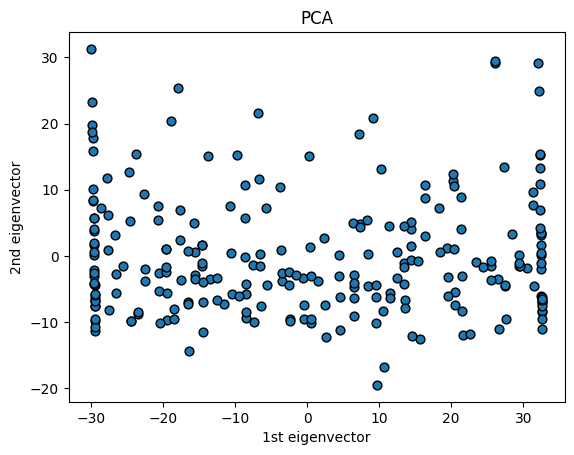

In [21]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], edgecolor='k', s=40)
plt.title("PCA")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

In [22]:
# variance per component
eigenvalues = pca_instance.explained_variance_
# Percentage of variance explained by each of the selected components.
# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
scaled_eigenvalues = pca_instance.explained_variance_ratio_
# eigenvectors, i.e., axes of reference
eigenvectors = pca_instance.components_


# norm of the whole transformation
transformation_norm_per_column = (X_pca ** 2).sum(axis=0)
cumulative_norm_per_reduction = np.cumsum(transformation_norm_per_column)

pca_dataframe = pd.DataFrame.from_records(
    zip(
        eigenvalues,
        scaled_eigenvalues,
        cumulative_norm_per_reduction
    ),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"]
)
pca_dataframe

,eigenvalues,scaled_eigenvalues,transformation_norm
0,463.858095,0.846482,112717.517007
1,82.437953,0.150439,132749.939536
2,1.043498,0.001904,133003.509493
3,0.554091,0.001011,133138.153572
4,0.089573,0.000163,133159.919745


### Scree Plot: eigenvalues

A **scree plot** is a visual tool used in **Principal Component Analysis (PCA)** to help determine the number of principal components to keep.

**What It Shows**

- The **x-axis** represents the principal components (PC1, PC2, ...).  
- The **y-axis** represents the **amount of variance explained** by each component (or the eigenvalue).  
- Typically, the components are ordered from the **most variance explained** to the least.


**Purpose**

- Helps identify the **"elbow point"**, where adding more components **does not significantly increase explained variance**.  
- The components before the elbow are usually kept, as they capture most of the information.

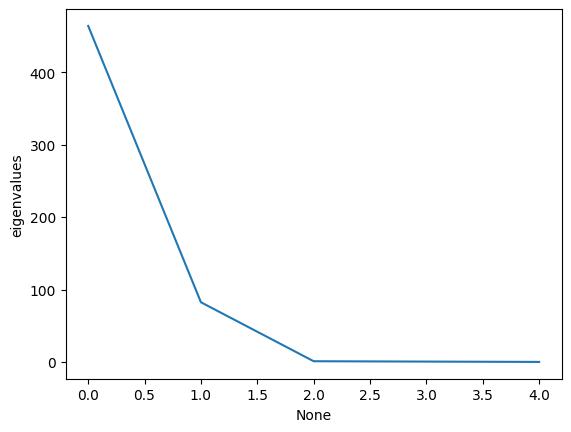

In [23]:
g = sns.lineplot(
    pca_dataframe,
    y="eigenvalues",
    x=pca_dataframe.index
)

## $t$-SNE

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    init="random",  # one of "random", "pca" (runs t-SNE on a PCA mapping of the data)
    perplexity=25,  # the higher, the looser the clusters
    max_iter=250,  # maximum number of iterations
)
X_tsne = tsne.fit_transform(df_num)

# optimization success
divergence = tsne.kl_divergence_

In [25]:
divergence

1.7976931348623157e+308

---

## Understanding representations

Representations (particularly $t$-SNE, which was developed with this goal in mind) can also give us a different view of the data.

In [27]:
df_pca = pd.DataFrame(X_pca[:, :2], columns=["pca_x", "pca_y"])
df_tsne = pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"])

df_dim = pd.concat([df, df_tsne, df_pca], axis="columns")

<Axes: xlabel='pca_x', ylabel='pca_y'>

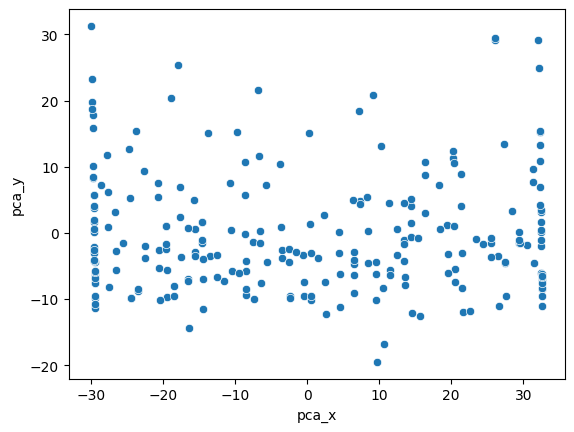

In [28]:
sns.scatterplot(
    df_dim,
    x="pca_x",
    y="pca_y",
)

<Axes: xlabel='tsne_x', ylabel='tsne_y'>

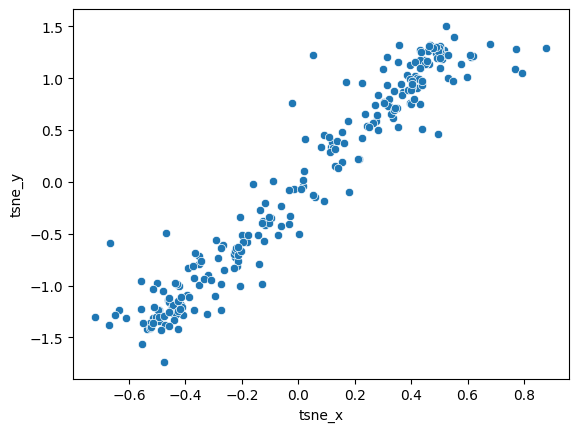

In [29]:
sns.scatterplot(
    df_dim,
    x="tsne_x",
    y="tsne_y",
)